In [1]:
# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS =15
BATCH_SIZE =30
TEST_SIZE = 2
learning = 0.0001
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [2]:
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd"dataset3"

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code/dataset3


In [4]:
# 
training_data_dir ="train" # 
validation_data_dir = "test" #

In [5]:
#ResNet18 - Pretrained

import keras
from classification_models.keras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
%matplotlib inline
base_model = ResNet18(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(2, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


import warnings
warnings.filterwarnings("ignore")

#model.summary()

In [6]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [7]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False)

Found 1003 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [10]:
import h5py
import numpy as np
from sklearn.utils import shuffle
from keras.layers import Dense,Input,Dropout
#from keras.models import ModelP

In [11]:
%%time
train = model.predict_generator(training_generator, training_generator.samples)
test = model.predict_generator(validation_generator, validation_generator.samples)
with h5py.File("gap_%s.h5"%ResNet18.__name__) as h:
    h.create_dataset("train", data=train)
    h.create_dataset("test", data=test)
    h.create_dataset("label", data=training_generator.classes)

CPU times: user 2min 23s, sys: 4.57 s, total: 2min 28s
Wall time: 2min 52s


In [12]:
ls

Dense169.h5*                 model169.h5*         Resnet18.h5*
DenseNet Fast-ScoreCam.png*  model2.h5*           test/
gap_DenseNet169.h5*          model_summary2.txt*  train/
gap_ResNet18.h5*             model_summary3.txt*  training_logs2.csv*
gap_Xception.h5*             model_summary4.txt*  training_logs3.csv*
hybrid.h5*                   model_summary.txt*   training_logs5.csv*
hybrid_model_summary.txt*    model_x.h5*          training_logs.csv*
hybrid_training_logs.csv*    plot.png*            Xception.h5*


In [14]:
import h5py
import numpy as np
from sklearn.utils import shuffle
from keras.layers import Dense,Input,Dropout
#from keras.models import ModelP
#import get_csv
np.random.seed(2017)

X_train = []
X_test = []
for filenames in ["gap_ResNet18.h5", "gap_DenseNet169.h5", "gap_Xception.h5"]:
    filename = filenames
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])
X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)

In [32]:
X_train.shape

(1003, 6)

In [18]:
inputs

<tf.Tensor 'input_1:0' shape=(None, 6) dtype=float32>

In [33]:
X_train.shape

(1003, 6)

In [35]:
inputss = Input(X_train.shape)

In [15]:
inputs = Input(X_train.shape[1:])
x = Dropout(0.5)(inputs)
x = Dense(1, activation='sigmoid')(x)
modell = Model(inputs, x)
modell.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
a=modell.fit(X_train, y_train, batch_size=30, epochs=EPOCHS, validation_split=0.2,verbose=2)

Epoch 1/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4825 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 2/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.5025 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 3/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4800 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 4/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4988 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 5/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4601 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 6/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4788 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 7/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4988 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 8/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.5299 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 9/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4925 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 10/15
27/27 - 0s - loss: 4.8457e-08 - ac

In [16]:
modell.fit(X_train, y_train, batch_size=30, epochs=EPOCHS, validation_split=0.2,verbose=2)

y_pred = modell.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

Epoch 1/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4501 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 2/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4813 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 3/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4726 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 4/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 5/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4713 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 6/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4713 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 7/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4738 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 8/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4813 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 9/15
27/27 - 0s - loss: 4.8457e-08 - accuracy: 0.4975 - val_loss: 1.1921e-07 - val_accuracy: 0.9851
Epoch 10/15
27/27 - 0s - loss: 4.8457e-08 - ac

In [22]:
y_pred5 = modell.predict(X_test, verbose=1)

15/15 [==============================] - 0s 689us/step


In [27]:
import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from livelossplot import PlotLossesKeras

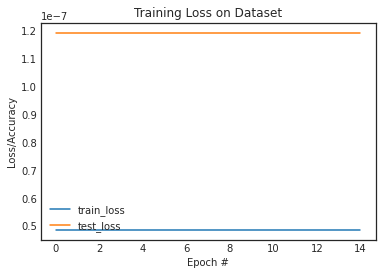

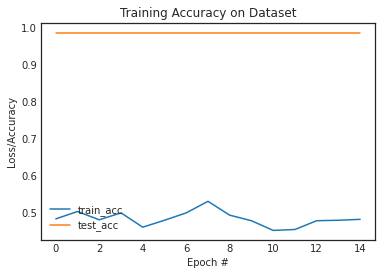

In [29]:
N = EPOCHS
plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), a.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), a.history["val_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

plt.style.use("seaborn-white")
plt.figure()
plt.plot(np.arange(0, N), a.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), a.history["val_accuracy"], label="test_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")